# Machine Learning Online Class - Exercise 1: Linear Regression

Instructions
------------

This file contains code that helps you get started on the
linear exercise. You will need to complete the following functions
in this exericse:

 * warmUpExercise.m
 * plotData.m
 * gradientDescent.m
 * computeCost.m
 * gradientDescentMulti.m
 * computeCostMulti.m
 * featureNormalize.m
 * normalEqn.m

For this exercise, you will not need to change any code in this file,
 or any other files other than those mentioned above.

* x refers to the population size in 10,000s
* y refers to the profit in $10,000s

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## Part 1: Basic Function

In [119]:
def warmUpExercise(n):
    return np.identity(n)


In [120]:
A = warmUpExercise(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## Part 2: Plotting

In [172]:
data =pd.read_csv('ex1data1.txt', sep =',', names= ['x', 'y'])

In [173]:
data.head()

x        y
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233

In [10]:
data.describe()

x          y
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000

In [174]:
X, y = data.iloc[:,0].to_numpy(),  data.iloc[:,1].to_numpy();

In [175]:
m = len(y)

In [176]:
X

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

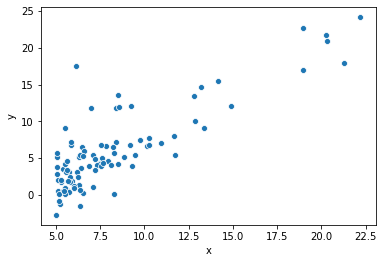

In [126]:
sns.scatterplot(x = 'x', y= 'y', data = data);

##  Part 3: Cost and Gradient descent

In [178]:
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01
X =np.c_[np.ones(m), data.iloc[:,0].to_numpy()] 

In [128]:
def computeCost(X, y, theta):
#     print(theta[0]*X[:, 0])
#     print(theta[1]*X[:, 1])
    h = theta[0]*X[:, 0]+ theta[1]*X[:, 1]
    cost = 1/(2*m)*np.sum((h - y)**2)   
    return cost

In [129]:
def gradientDescent(X, y, theta, alpha, num_iters):
    h = theta[0]*X[:, 0]+ theta[1]*X[:, 1]
    theta0 = theta[0] - (1/m)*alpha*np.sum(h - y)
    theta1 = theta[1] - (1/m)*alpha*np.sum((h - y)*X[:, 1])
    return np.append([theta0], [theta1], axis=0)

In [130]:
J_history = pd.DataFrame([])

In [131]:
for num_iters in range(0,10000):
    theta = theta
    J = computeCost(X, y, theta)
    J_history = J_history.append(pd.DataFrame({'iter': num_iters, 'cost': J}, index=[0]), ignore_index=True)
    theta = gradientDescent(X, y, theta, alpha, num_iters)

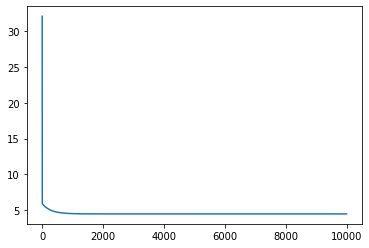

In [132]:
J_history.cost.plot();

In [133]:
theta

array([[-3.89578082],
       [ 1.19303364]])

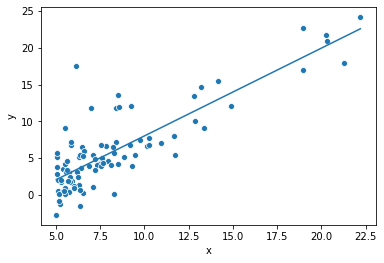

In [134]:
sns.scatterplot(x = 'x', y= 'y', data = data)
sns.lineplot(x = X[:, 1],  y = list(map(sum, X*theta.transpose())))

In [135]:
predict1 = np.dot([1, 3.5],theta)[0]

In [136]:
predict1*10000

2798.369139864536

In [137]:
predict2 = np.dot([1, 7],theta)[0]

In [138]:
predict2*10000

44554.546482411424

## Part 4: Visualizing J(theta_0, theta_1)

In [139]:
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

In [140]:
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

In [141]:
for i in range(0, len(theta0_vals)):
    for j in range (0,len(theta1_vals)):
        t = [theta0_vals[i], theta1_vals[j]]
        J_vals[i, j] = computeCost(X, y, t)
#         print (J_vals)

In [142]:
one, two = np.meshgrid(theta0_vals, theta1_vals)

In [143]:
J_vals.shape

(100, 100)

In [145]:
surface = go.Surface(x=one, y=two, z=J_vals)
data = [surface]

In [146]:
fig = go.Figure(data)

fig.update_layout(title='Visualizing J', autosize=False,
                  width=600, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()


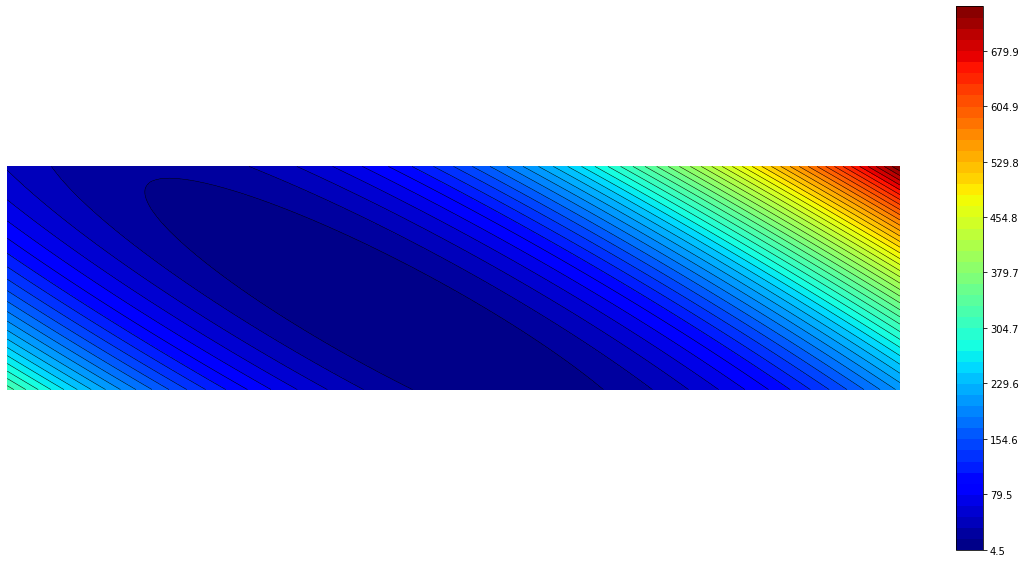

In [54]:
plt.figure(figsize=(20,10))
levels = np.linspace(J_vals.min(), J_vals.max(), 50)
cntr  = plt.contourf(one,two,J_vals,levels, cmap=plt.cm.jet)
plt.contour(one,two,J_vals,levels,colors='black', linewidths=0.5)
plt.colorbar(cntr)
plt.axis('equal')
plt.axis('off')

plt.show()

In [55]:
import plotly.graph_objects as go

fig = go.Figure(data =
    go.Contour(
        z=J_vals,
#         x=one, # horizontal axis
#         y=two # vertical axis
        contours=dict(
            start=J_vals.min(),
            end=J_vals.max(),
            size=50,
        )
    ))
fig.show()

# Linear regression with multiple variables

# Feature Normalization


• Subtract the mean value of each feature from the dataset.<br>
<br>
• After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”
 

In [191]:
def featureNormalize(x): # dont include vector 1
    X_norm = np.ones([x.shape[0],  x.shape[1]])
    mu = np.zeros((1, x.shape[1]))
    sigma = np.zeros((1, x.shape[1])) 
    for i in range(1, x.shape[1]):
        print(i)
        mu[:,i] = np.mean(x[:,i])
        sigma[:,i] = np.std(x[:,i])
        X_norm[:,i] = (x[:,i] - float(mu[:,i]))/float(sigma[:,i])
    return X_norm, mu, sigma

In [194]:
featureNormalize(X)

1


(array([[ 1.        , -0.53240565],
        [ 1.        , -0.68368294],
        [ 1.        ,  0.09319761],
        [ 1.        , -0.30042464],
        [ 1.        , -0.5974206 ],
        [ 1.        ,  0.0579498 ],
        [ 1.        , -0.17751184],
        [ 1.        ,  0.10865262],
        [ 1.        , -0.4347144 ],
        [ 1.        , -0.80656976],
        [ 1.        , -0.63614904],
        [ 1.        ,  1.55957946],
        [ 1.        , -0.63009691],
        [ 1.        ,  0.06457337],
        [ 1.        , -0.6543314 ],
        [ 1.        , -0.72220358],
        [ 1.        , -0.46609197],
        [ 1.        , -0.78695878],
        [ 1.        , -0.44941614],
        [ 1.        , -0.28286567],
        [ 1.        , -0.51188555],
        [ 1.        ,  3.14560127],
        [ 1.        , -0.69344947],
        [ 1.        , -0.47630007],
        [ 1.        , -0.67402031],
        [ 1.        ,  2.80143506],
        [ 1.        ,  1.21255602],
        [ 1.        ,  0.726

# Normal Equation

In the lecture videos, you learned that the closed-form solution to linear regression is 
\begin{equation*}
\theta = (X^TX)^{-1}X^Ty
\end{equation*}

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent.<br>
<br>

In [197]:
def normalEqn(x, y):
    theta = np.zeros((x.shape[0], 1))
    normal = np.dot(np.linalg.inv(np.dot(X.transpose(), X)), np.dot(X.transpose(), y))
    return normal

In [198]:
thetas = normalEqn(X, y)

In [199]:
thetas

array([-3.89578088,  1.19303364])

# Multiple Linear Regression

In [200]:
def computeCostMulti(X, y, theta):
    h = 0
    for i in range(0, X.shape[1]):
        cost_for_column = theta[i]*X[:, i]
        h =  h + cost_for_column
    cost = 1/(2*m)*np.sum((h - y)**2)   
    return cost

In [201]:
theta

array([[0.],
       [0.]])

In [203]:
computeCostMulti(X, y, theta)

32.072733877455676

In [204]:
computeCost(X, y, theta)

32.072733877455676

In [206]:
X = np.append(X, np.random.rand(97,3), axis=1)

In [212]:
X

array([[1.00000000e+00, 6.11010000e+00, 3.43125406e-01, 3.38073647e-01,
        7.90744363e-01],
       [1.00000000e+00, 5.52770000e+00, 5.30343902e-01, 5.94324223e-01,
        3.30239478e-01],
       [1.00000000e+00, 8.51860000e+00, 1.57759825e-01, 8.99303720e-01,
        5.95155275e-01],
       [1.00000000e+00, 7.00320000e+00, 8.96659651e-01, 8.59408381e-01,
        5.54573198e-01],
       [1.00000000e+00, 5.85980000e+00, 6.63138364e-01, 3.58520459e-02,
        5.79921184e-01],
       [1.00000000e+00, 8.38290000e+00, 5.86189559e-01, 3.72383722e-01,
        3.82251399e-01],
       [1.00000000e+00, 7.47640000e+00, 9.62027696e-01, 8.18051901e-01,
        7.22503407e-01],
       [1.00000000e+00, 8.57810000e+00, 7.31542552e-01, 7.73889554e-01,
        2.14656615e-01],
       [1.00000000e+00, 6.48620000e+00, 5.13968806e-01, 7.60878574e-01,
        2.31798711e-01],
       [1.00000000e+00, 5.05460000e+00, 6.46964305e-01, 6.23260130e-01,
        4.85255870e-01],
       [1.00000000e+00, 5.7107

In [213]:
theta = np.zeros((5, 1))

In [214]:
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [215]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = pd.DataFrame([])
    for i in range(0,num_iters):
        J = computeCostMulti(X, y, theta)
#         print(J)
        J_history = J_history.append(pd.DataFrame({'iter': num_iters, 'cost': J}, index=[0]), ignore_index=True)
        theta = theta - alpha*(1.0/m) * np.dot(np.transpose(X), X.dot(theta) - np.transpose([y]))
        
    return theta, J_history

In [216]:
gradientDescentMulti(X, y, theta, alpha, 1500)

(array([[-2.69598999],
        [ 1.16740845],
        [-0.20350903],
        [-0.71435379],
        [-0.92902593]]),
       iter       cost
 0     1500  32.072734
 1     1500   6.718261
 2     1500   5.965121
 3     1500   5.933686
 4     1500   5.923489
 ...    ...        ...
 1495  1500   4.493863
 1496  1500   4.493816
 1497  1500   4.493769
 1498  1500   4.493721
 1499  1500   4.493674
 
 [1500 rows x 2 columns])

In [218]:
J_history = pd.DataFrame([])

In [219]:
for num_iters in range(0,1500):
    theta = theta
    J = computeCost(X, y, theta)
    J_history = J_history.append(pd.DataFrame({'iter': num_iters, 'cost': J}, index=[0]), ignore_index=True)
    theta = gradientDescent(X, y, theta, alpha, num_iters)
#     print(theta)

In [220]:
J_history

iter       cost
0        0  32.072734
1        1   6.737190
2        2   5.931594
3        3   5.901155
4        4   5.895229
...    ...        ...
1495  1495   4.483505
1496  1496   4.483482
1497  1497   4.483458
1498  1498   4.483435
1499  1499   4.483411

[1500 rows x 2 columns]

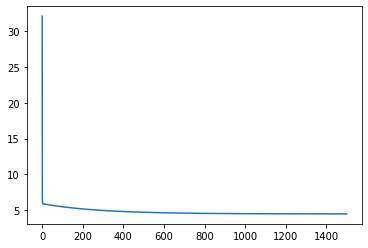

In [221]:
J_history.cost.plot()